In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [166]:
# This function is the Riegel formula for predicting race time T2 over distance D2 
# from a previous time T1 over a distance D1

def Riegel(T1_sec, D1, D2):
    T2_sec = (T1_sec) * (float(D2)/float(D1))*1.06
    return T2_sec

In [224]:
# Read the data into a pandas dataframe

df = pd.read_csv('test_times_data_2016_women_10k.csv')
print df.head()

  60_PB 100_PB 200_PB 400_PB 600_PB   800_PB  1000_PB 1200_PB  1500_PB  \
0   NaN    NaN    NaN    NaN    NaN  2:04.00  2:40.87     NaN  4:06.69   
1   NaN    NaN    NaN    NaN    NaN  2:12.22  2:57.73  3:57.7  4:03.74   
2   NaN    NaN    NaN    NaN    NaN   2:12.7      NaN     NaN  4:09.16   
3   NaN    NaN    NaN   66.3    NaN  2:10.25      NaN     NaN  4:15.93   
4   NaN    NaN    NaN    NaN    NaN   2:17.5      NaN     NaN   4:44.8   

    Mile_PB   ...    5000_2016 10000_2016 1M_2016 2M_2016 3K_2016 5K_2016  \
0  4:35.52i   ...      15:48.4   33:07.93     NaN     NaN    9:25   15:52   
1       NaN   ...     15:05.00        NaN  4:25.6     NaN    9:23   15:57   
2    4:46.9   ...     15:08.58        NaN     NaN     NaN    9:20     NaN   
3  4:39.08i   ...     15:37.65   33:00.13     NaN     NaN     NaN   16:09   
4       NaN   ...          NaN        NaN     NaN     NaN     NaN     NaN   

  10K_2016 10M_2016 HM_2016 Mar_2016  
0    31:46      NaN   73:25      NaN  
1    32:30    

In [216]:
# Convert the athlete's 5k and 10k times into seconds, removing those in both columns 
# where there is not a value for 5k (there is always a value for 10k)

#athlete_5k = [int(float(str(i)[:2])*60 + float(str(i)[3:5])) for i in df['5K_2016'] if str(i) != 'nan']
#athlete_10k = [int(float(str(df['10K_2016'][i])[:2])*60 + float(str(df['10K_2016'][i])[3:5])) for i in range(0, len(df['10K_2016'])) if str(df['5K_2016'][i]) != 'nan']

athlete_HM = [int(float(str(i)[:2])*60 + float(str(i)[3:5])) for i in df['HM_2016'] if str(i) != 'nan']
athlete_10k = [int(float(str(df['10K_2016'][i])[:2])*60 + float(str(df['10K_2016'][i])[3:5])) for i in range(0, len(df['10K_2016'])) if str(df['HM_2016'][i]) != 'nan']

#athlete_10k = [int(float(str(i)[:2])*60 + float(str(i)[3:5])) for i in df['10K_2016'] if str(i) != 'nan']
#athlete_HM = [int(float(str(df['HM_2016'][i])[:2])*60 + float(str(df['HM_2016'][i])[3:5])) for i in range(0, len(df['HM_2016'])) if str(df['10K_2016'][i]) != 'nan']

In [217]:
# Make an array for 5k times and calculate 10k times using the Riegel formula

#time_5k = np.arange(15*60, 21*60, 10)
#time_10k = [Riegel(i, 5, 10) for i in time_5k]

time_HM = np.arange(60*60, 83*60, 10)
time_10k = [Riegel(i, 21.0824064, 10) for i in time_HM]

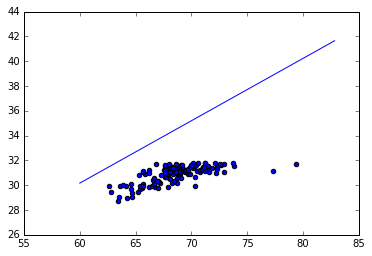

In [218]:
# Convert all times into minutes and plot both the model and the times

#time_5k_mins = [i/60.0 for i in time_5k]
time_HM_mins = [i/60.0 for i in time_HM]
time_10k_mins = [i/60.0 for i in time_10k]
#athlete_5k_mins = [i/60.0 for i in athlete_5k]
athlete_HM_mins = [i/60.0 for i in athlete_HM]
athlete_10k_mins = [i/60.0 for i in athlete_10k]
#plt.plot(time_5k_mins, time_10k_mins)
#plt.scatter(athlete_5k_mins, athlete_10k_mins)
plt.plot(time_HM_mins, time_10k_mins)
plt.scatter(athlete_HM_mins, athlete_10k_mins)